In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.model_selection import GridSearchCV

# turn off warnings (for sklearn fit function)
import warnings
warnings.filterwarnings("ignore")

random_state = 42

QUESTION 1

In [18]:
titanic_df = pd.read_csv('C:\\Users\\Miswa Gandhi\\Desktop\\titanic.csv')
titanic_df.head(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,6,1st,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.549999,E12,Southampton,3,NaN,"New York, NY"
6,7,1st,1,"Andrews, Miss. Kornelia Theodos",female,63.0000,1,0,13502,77.958298,D7,Southampton,10,NaN,"Hudson, NY"
7,8,1st,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.000000,A36,Southampton,NaN,NaN,"Belfast, NI"
8,9,1st,1,"Appleton, Mrs. Edward Dale (Cha",female,53.0000,2,0,11769,51.479199,C101,Southampton,D,NaN,"Bayside, Queens, NY"
9,10,1st,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.504200,NaN,Cherbourg,NaN,22.0,"Montevideo, Uruguay"


In [19]:
titanic_df.dtypes.value_counts()

object     8
int64      4
float64    3
dtype: int64

In [20]:
titanic_df.isnull().sum()

Unnamed: 0       0
pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64

In [21]:
titanic_df['age'].mean()

29.881134512434034

In [22]:
titanic_df['age'].fillna(titanic_df['age'].mean(), inplace=True)

In [23]:
titanic_df['age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [24]:
titanic_df['age'].isnull().sum()

0

In [25]:
titanic_df['body'].mean()

160.8099173553719

In [26]:
titanic_df['body'].fillna(titanic_df['body'].mean(), inplace=True)

In [27]:
titanic_df['body'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: body, Length: 1309, dtype: bool

In [28]:
titanic_df['body'].isnull().sum()

0

In [29]:
titanic_df.head(5) #filled out the numerical missing values

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
titanic_df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.000000,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.454200,NaN,Cherbourg,NaN,160.809917,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.000000,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.225000,NaN,Cherbourg,NaN,160.809917,NaN


In [32]:
titanic_df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.337494,B5,Southampton,2,160.809917,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.550003,C22 C26,Southampton,11,160.809917,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.000000,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.000000,1,2,113781,151.550003,C22 C26,Southampton,NaN,160.809917,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.000000,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.454200,NaN,Cherbourg,NaN,160.809917,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.000000,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.225000,NaN,Cherbourg,NaN,160.809917,NaN


In [39]:
gender = {'male':1 , 'female':0 }
titanic_df['sex'] = [gender[item] for item in titanic_df['sex']]

In [40]:
pclass = {'1st':1 , '2nd':2 ,'3rd':3}
titanic_df['pclass'] = [pclass[item] for item in titanic_df['pclass']]

In [33]:
x, y = titanic_df[['age','pclass','sex','sibsp']], titanic_df['survived']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0,test_size= 0.2)

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0,max_leaf_nodes = 3)

clf.fit(X_train, Y_train)
#clf.predict(X_test)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, random_state=0)

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
titanic_vectorizer = DictVectorizer(sparse=False)
titanic_feature_cols = ['pclass', 'sex', 'age']
target_col = 'survived'
titanic_data = titanic_df[[*titanic_feature_cols, target_col]].dropna()
titanic_features = titanic_data[titanic_feature_cols]
X = titanic_vectorizer.fit_transform(titanic_features.to_dict('records'))
titanic_vectorizer.get_feature_names()
y = titanic_data[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

clf = DecisionTreeClassifier(ccp_alpha=0.003)
clf = clf.fit(X_train, y_train)

print(titanic_vectorizer.get_feature_names())

print(export_text(clf, feature_names=titanic_vectorizer.get_feature_names()))

['age', 'pclass', 'sex']
|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- class: 0
|--- sex >  0.50
|   |--- age <= 9.50
|   |   |--- pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- pclass >  2.50
|   |   |   |--- class: 0
|   |--- age >  9.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- class: 0



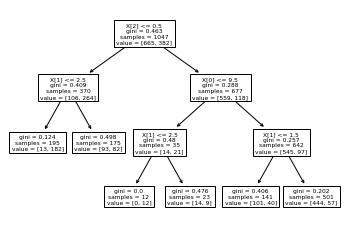

In [43]:
tree.plot_tree(clf);

In [46]:
tree_parameter = {'criterion':['gini','entropy'],'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf_grid = GridSearchCV(DecisionTreeClassifier(), tree_parameter, cv=5)
clf_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            15, 20, 30, 40, 50, 70, 90, 120,
                                            150]})

In [65]:
predictY = clf_grid.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
score_test_decestionTreeClassifier = accuracy_score(Y_test,predictY)

In [68]:
score_test_decestionTreeClassifier

0.6183206106870229

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators = 50,max_depth=5)
rfr.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [70]:
predictY_RandomForest = rfr.predict(X_test)

In [71]:
score_test_RandomForestClassifier = accuracy_score(Y_test,predictY_RandomForest)

In [72]:
score_test_RandomForestClassifier

0.6259541984732825

In [54]:
from sklearn.metrics import f1_score
f1_score(Y_test,predictY_RandomForest)

0.18333333333333335

In [75]:
train_survive_indexes = np.where(y_train == 1)[0]
train_survive_predictions = gs_clf.predict(X_train[train_survive_indexes])
inv_train_survive_predictions = np.logical_not(train_survive_predictions).astype(int)
print(f'in survive= {(len(train_survive_predictions) - np.count_nonzero(inv_train_survive_predictions)) / len(train_survive_predictions) * 100:.3f}%')

train_fatality_indexes = np.where(y_train == 0)[0]
train_fatality_predictions = gs_clf.predict(X_train[train_fatality_indexes])
print(f'in fatalities = {(len(train_fatality_predictions) - np.count_nonzero(train_fatality_predictions)) / len(train_fatality_predictions) * 100:.3f}%')

test_survive_indexes = np.where(y_test == 1)[0]
test_survive_predictions = gs_clf.predict(X_test[test_survive_indexes])
inv_test_survive_predictions = np.logical_not(test_survive_predictions).astype(int)
print(f'out-of-sample survive predicted = {(len(test_survive_predictions) - np.count_nonzero(inv_test_survive_predictions)) / len(test_survive_predictions) * 100:.3f}%')

test_fatality_indexes = np.where(y_test == 0)[0]
test_fatality_predictions = gs_clf.predict(X_test[test_fatality_indexes])
print(f'out-of-sample fatalities predicted = {(len(test_fatality_predictions) - np.count_nonzero(test_fatality_predictions)) / len(test_fatality_predictions) * 100:.3f}%')

in-sample survive predicted = 50.785%
in-sample fatalities predicted = 98.045%
out-of-sample survive predicted = 44.915%
out-of-sample fatalities predicted = 97.222%
